<a href="https://colab.research.google.com/github/FRED984/Cat_VS_Dog/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  i

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                           batch_size=batch_size,
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                           target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                           batch_size=batch_size,
                                                           class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(directory='/content/cats_and_dogs/test',
                                                           target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                           batch_size=1,
                                                           class_mode='binary',
                                                          shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


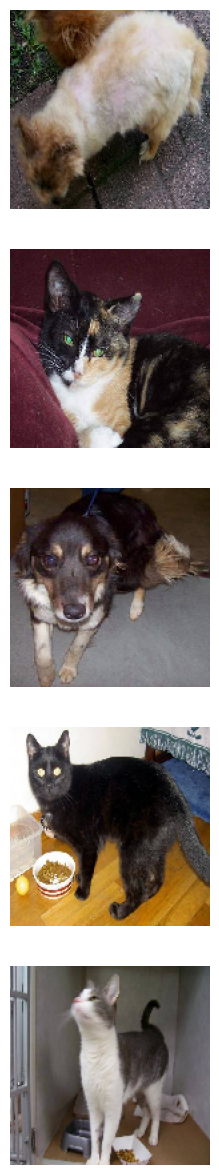

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


Found 2000 images belonging to 2 classes.


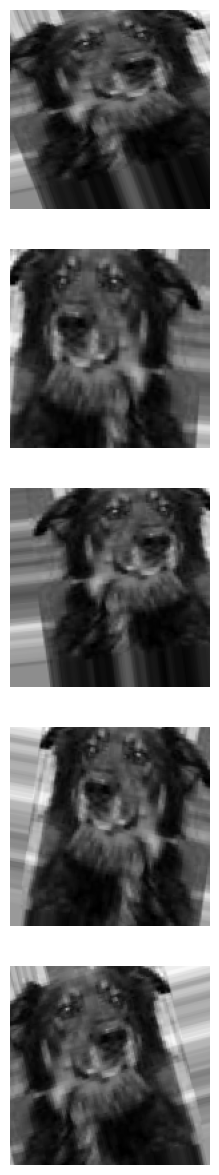

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 36, 36, 64)       

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 8
history = model.fit(train_data_gen, epochs=epochs, steps_per_epoch=len(train_data_gen),validation_data=val_data_gen,validation_steps=len(val_data_gen), verbose=1)

Epoch 1/15
16/16 [==============================] - 154s 9s/step - loss: 0.7270 - accuracy: 0.5170 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 144s 9s/step - loss: 0.6934 - accuracy: 0.5010 - val_loss: 0.6927 - val_accuracy: 0.5170
Epoch 3/15
16/16 [==============================] - 143s 9s/step - loss: 0.6920 - accuracy: 0.5090 - val_loss: 0.6921 - val_accuracy: 0.5270
Epoch 4/15
16/16 [==============================] - 143s 9s/step - loss: 0.6877 - accuracy: 0.5360 - val_loss: 0.6798 - val_accuracy: 0.5770
Epoch 5/15
16/16 [==============================] - 139s 8s/step - loss: 0.6799 - accuracy: 0.5610 - val_loss: 0.6568 - val_accuracy: 0.6110
Epoch 6/15
16/16 [==============================] - 143s 9s/step - loss: 0.6649 - accuracy: 0.5915 - val_loss: 0.6518 - val_accuracy: 0.5870
Epoch 7/15
16/16 [==============================] - 143s 9s/step - loss: 0.6617 - accuracy: 0.5740 - val_loss: 0.6605 - val_accuracy: 0.5840
Epoch 8/15
16

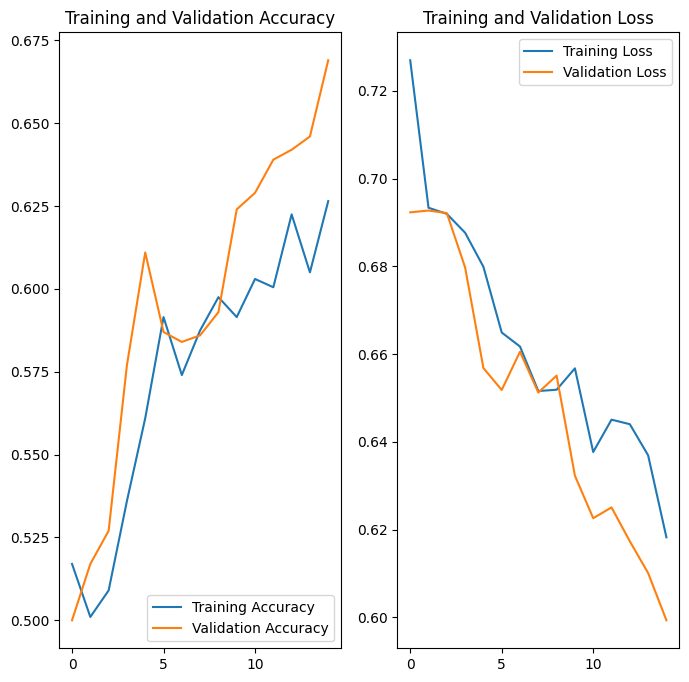

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities = model.predict(test_data_gen)

print(probabilities)

50/50 [==============================] - 2s 30ms/step
[[0.3512631 ]
 [0.4030381 ]
 [0.12876707]
 [0.51446676]
 [0.455619  ]
 [0.4710792 ]
 [0.42833564]
 [0.35764846]
 [0.4963768 ]
 [0.9620265 ]
 [0.45530108]
 [0.4809298 ]
 [0.43747994]
 [0.45072374]
 [0.4525294 ]
 [0.7771722 ]
 [0.43007818]
 [0.75090665]
 [0.50708824]
 [0.44301957]
 [0.291595  ]
 [0.48680726]
 [0.41206697]
 [0.46275944]
 [0.40962905]
 [0.3427743 ]
 [0.75609994]
 [0.42158306]
 [0.34327075]
 [0.41731822]
 [0.47416902]
 [0.29617205]
 [0.41112983]
 [0.9997986 ]
 [0.30815214]
 [0.5460506 ]
 [0.9980306 ]
 [0.5451022 ]
 [0.3776643 ]
 [0.4654674 ]
 [0.4316084 ]
 [0.48111624]
 [0.6363832 ]
 [0.37943935]
 [0.25129533]
 [0.331202  ]
 [0.49377495]
 [0.39591515]
 [0.45869955]
 [0.31713825]]


In [ ]:
predict_probability=[]
for prob in probabilities:
  if prob >=0.5:
    predict_probability.append(1)
  else:
    predict_probability.append(0)

probabilities=predict_probability

print(probabilities)


[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [ ]:


def plotImages(images_arr, probabilities):
    # Reshape the images_arr to a 2-dimensional array
    images_arr = np.array(images_arr).reshape(-1, 28, 28)

    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    for img, probability, ax in zip(images_arr, probabilities, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Cat: {probability}% Dog')

plotImages(test_data_gen, probabilities)

50/50 [==============================] - 1s 25ms/step


<ipython-input-13-1741599ab3c7>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probabilities = [int(prob * 100) for prob in probabilities]


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
